# Moving Average Crossover Momentum Strategy

Momentum is the persistence of returns or trend in a particular direction. Identifying momentum in the price of an asset can help you take informed positions and make profits in the market.

After completing the notebook, you will be able to 
1. Read data from a CSV file
2. Calculate moving average of prices
3. Generate trading signals for moving average crossover strategy
4. Factor in trading commissions
5. Plot cumulative strategy returns and drawdowns


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

/var/folders/y1/h3rdxlrj2qvdwwjh6r3b721m0000gp/T/ipykernel_11469/2110474404.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [5]:
data = pd.read_csv('src_data/QCOM_2015_2020.csv', index_col='Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,75.209999,75.410004,74.309998,74.330002,61.141441,7763500
2015-01-02,74.510002,74.870003,73.750000,74.279999,61.100296,6662700
2015-01-05,73.709999,74.500000,73.629997,73.930000,60.812389,12042800
2015-01-06,73.860001,74.610001,72.739998,72.879997,59.948669,11094000
2015-01-07,73.370003,74.470001,72.959999,73.730003,60.647869,10030700
...,...,...,...,...,...,...
2019-12-24,88.620003,88.809998,87.980003,88.769997,87.393005,2435200
2019-12-26,88.919998,88.959999,88.000000,88.400002,87.028748,5070000
2019-12-27,88.900002,88.949997,88.089996,88.800003,87.422539,5808900


In [6]:
# Convert date to date-time format
data.index = pd.to_datetime(data.index)

# Slicing out only the Adjusted close column
data = data[['Adj Close']]

## Calculate the moving averages

In the code below:
1. You first set the length of the short and long term moving windows. 
2. You will thereafter calculate the short term and long term moving averages. 

The rolling/moving averages are calculated by using the ```rolling()``` function. You will apply this function on the adjusted close series of the asset. The adjusted close is used as it is the stock split and merger adjusted last close price.

Internally, the ```rolling()``` function selects a window of prices and then applies a summary function to it. Here you have used the ```mean()``` function. The syntax is given below:


Syntax: 
```python
data['Adj Close'].rolling(window_size).mean()
```
1. **window_size**: size of the window for which we are finding the rolling mean

Here for moving windows of size window_size you are applying the function ```mean()``` for average to be calculated for each movement of the window.

In [8]:
# Short term window size
short_term_window_size = 40

# Long term window size
long_term_window_size = 70

# Store the short term moving average in a new column 'window_ST'
data.loc[:, 'window_ST'] = data['Adj Close'].rolling(
    short_term_window_size).mean()

# Store the long term moving average in a new column 'window_LT'
data.loc[:, 'window_LT'] = data['Adj Close'].rolling(
    long_term_window_size).mean()

/var/folders/y1/h3rdxlrj2qvdwwjh6r3b721m0000gp/T/ipykernel_11469/848328164.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'window_ST'] = data['Adj Close'].rolling(
/var/folders/y1/h3rdxlrj2qvdwwjh6r3b721m0000gp/T/ipykernel_11469/848328164.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'window_LT'] = data['Adj Close'].rolling(


## Plot the moving averages and the stock price

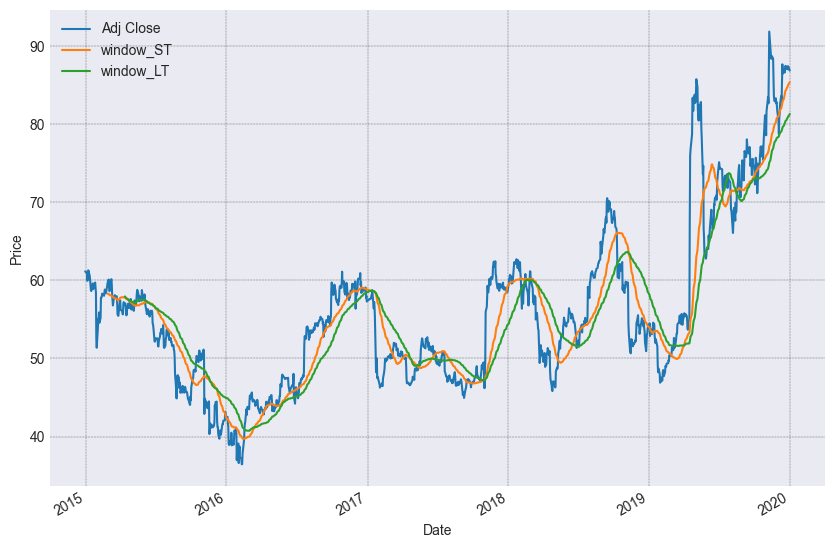

In [9]:
data.plot(figsize=(10, 7))
plt.ylabel('Price')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
plt.show()

## Generating the trade signals

In the code below, 
1. You compare the short term and long term moving average. These averages were calculated in the code above. 
2. If the short term moving average is greater than the long term moving average we set the signal as +1. +1 implies buy. -1 implies sell.

In [10]:
# Compare the value of short term and long term window and set buy or sell signal at each point
# This is done using the numpy where function
data.loc[:, 'signal'] = np.where(data['window_ST'] > data['window_LT'], 1, -1)

# Apply the signal on the next day
data.loc[:, 'signal'] = data['signal'].shift(1)

# Replace NaN values with 0
data.loc[:, 'signal'] = data['signal'].replace(np.nan, 0)
data.tail(5)

/var/folders/y1/h3rdxlrj2qvdwwjh6r3b721m0000gp/T/ipykernel_11469/422909851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'signal'] = np.where(data['window_ST'] > data['window_LT'], 1, -1)


,Adj Close,window_ST,window_LT,signal
Date,,,,
2019-12-24,87.393005,84.674327,80.707758,1.0
2019-12-26,87.028748,84.855677,80.852836,1.0
2019-12-27,87.422539,85.052246,81.000608,1.0
2019-12-30,87.058281,85.264130,81.152528,1.0
2019-12-31,86.861382,85.394405,81.326616,1.0


## Plot the positions taken

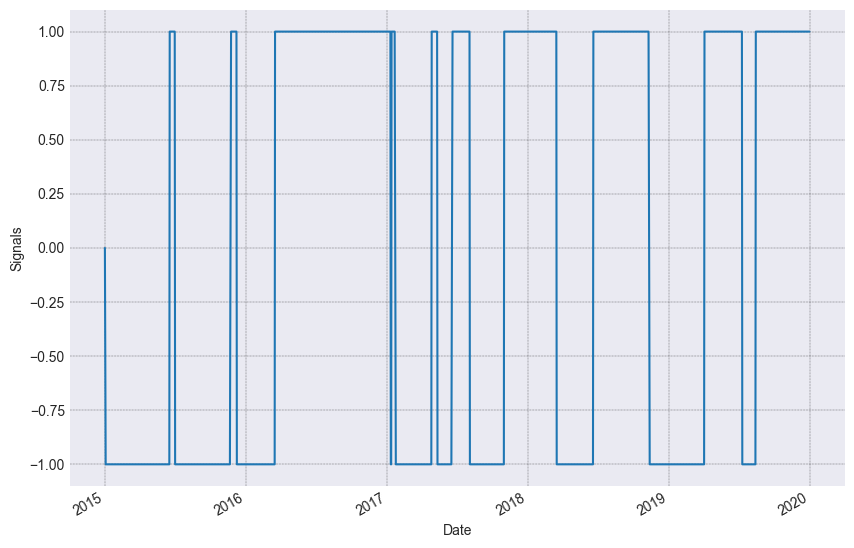

In [11]:
plt.figure(figsize=(10, 7))

# Plot drawdowns
data['signal'].plot()
plt.ylabel('Signals')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
plt.show()

## Calculate returns

In the code below, you calculate the returns the strategy generates by taking a product of the daily percentage change with signals generated above. The function ```pct_change()``` can be applied to a given column in the dataframe. It tells you the change of price from a day before in terms of percentage. It is using the following formula:

In [12]:
# Calculate the returns by multiplying the signal with daily price change
returns = data['signal']*data['Adj Close'].pct_change()

## Factoring in trading cost

In the code below, you factor in the trading commission into the daily returns. The commission is one-thousandth percent of the number of positions changed. For example, if you go from a buy position (+1) to a sell position (-1) the commission will be calculated as follows:

$$(0.001 * absolute(1-(-1))) = (0.001* absolute(2)) = (0.001 * 2) = 0.002$$

Like wise if the position is buy and continues to remain buy then in the commission is:

$$(0.001 * absolute(1-1)) = (0.001* absolute(0)) = (0.001 * 0) = 0$$

In [13]:
# Trading cost applied when position changed
cost = (0.001 * np.abs(data['signal'] - data['signal'].shift(-1)))

# Applying cost to returns
returns = returns - cost

## Evaluating the strategy

In the code, below you evaluate the strategy using three popular metrics: 
1. Cumulative returns
2. Sharpe ratio
3. Maximum Drawdown 

Whether a strategy goes live for trading in financial markets is evaluated based on how well it does in the backtest. These measures along will some more check how well a strategy does on historical data.

### Cumulative returns

Cumulative returns is the aggregate change in returns over a period of time. 

In the code below: 
1. You calculate the cumulative returns. Cumulative returns are calculated using ```cumprod()``` which calculates the sequential product. For example, given below are a series and it's ```cumprod()```:

    series ---> [1,7,3,3,4]
    cumprod ---> [1,7,21,63,252]

2. You also plot the cumulative returns in case of simply buying the asset and holding it till the end of the data. This is called buying and holding. 

As we can see from the trajectory and also the final returns, moving average crossover strategy performed much better in comparison.

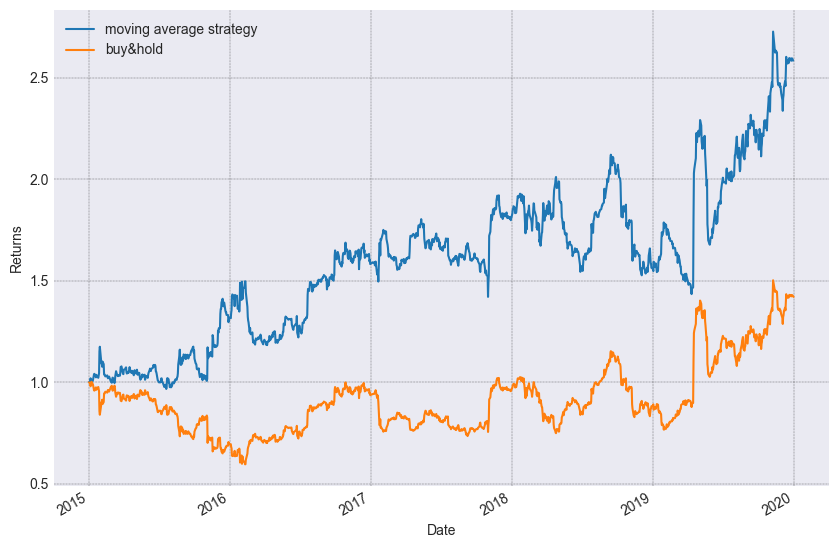

The cumulative returns: 2.584509872894181


In [14]:
plt.figure(figsize=(10, 7))
cumret = (returns+1).cumprod()
cumret.plot()  # Strategy

(data['Adj Close'].pct_change()+1).cumprod().plot()  # Buy and Hold

plt.legend(['moving average strategy', 'buy&hold'])
plt.ylabel('Returns')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
plt.show()

print('The cumulative returns: '+str((returns+1).prod()))

### Sharpe ratio

Sharpe ratio is the average returns per unit of risk. The risk is measured as the standard deviation. The standard deviation is a measure of risk as it measures how much on average the prices move or disperse. Thereby, telling you the uncertainty associated with it.

As shown in the code below, we measure the sharpe ratio by taking the average returns and dividing it by the standard deviation. We also multiply the square root of 252. This is because we want to annualise the sharpe ratio. Annualisation is standardising a value to one year time.

In [15]:
# sharpe
(returns.mean()/returns.std())*(252)**(1/2)

0.7572151125566141

### Drawdown

A drawdown is the decline of the value of cumulative returns from it's last peak at each point in time. It is quoted as the percentage drop between the peak and the subsequent trough. In the code below, we calculate the drawdown as the percentage drop from the running max of the cumulative returns at each point.

Also note that the portfolio value begins from 1 and hence the maximum value of the portfolio (peak value) cannot be less than 1. However, there could be cases where the portfolio value drops below 1. For example, if the cumulative returns are -10%, -5%, -15%, then the running_max value would be 1*(1-0.1)(1-0.05)(1-0.15) = 0.738. 

So to avoid such cases, we will also set the `running_max` value as 1.

The maximum drawdown is -32.36


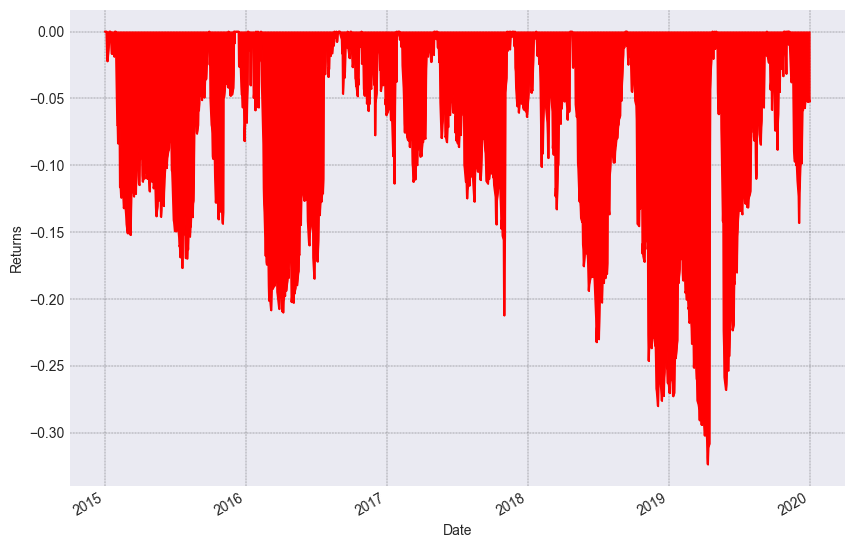

In [16]:
# Calculate the cumulative maximum value for the cumulative returns
running_max = np.maximum.accumulate(cumret.dropna())

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drop from the cumulative maximum and cumulative return at each point
drawdown = ((cumret)/running_max - 1)
max_dd = drawdown.min()*100
print('The maximum drawdown is %.2f' % max_dd)

# Set figure size
plt.figure(figsize=(10, 7))

# Plot drawdowns
drawdown.plot(color='r', figsize=(10, 7))
plt.ylabel('Returns')
plt.fill_between(drawdown.index, drawdown, color='red')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
plt.show()